In [4]:
import pandas as pd
df = pd.read_csv('./datasets/cities_r2.csv')

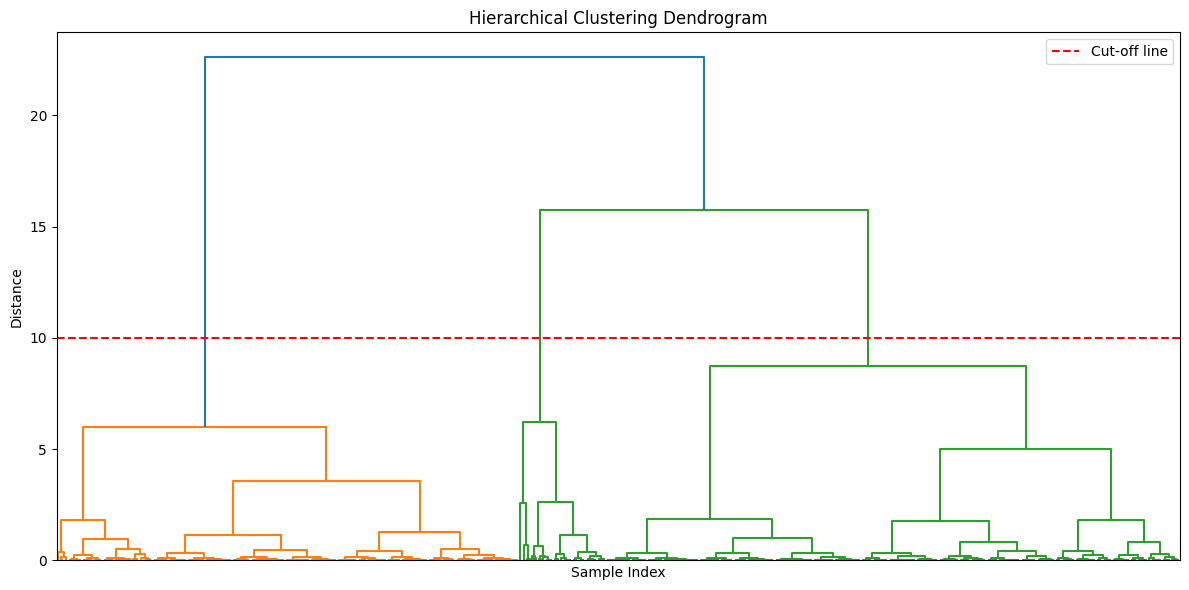

In [12]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Prepare data for clustering
X = df[['effective_literacy_rate_total']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute linkage matrix (hierarchical clustering)
linkage_matrix = linkage(X_scaled, method='ward')

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_font_size=10, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=10, c='red', linestyle='--', label='Cut-off line')
plt.legend()
plt.tight_layout()
plt.show()

Cluster distribution:
Cluster
1    203
2     38
3    252
Name: count, dtype: int64


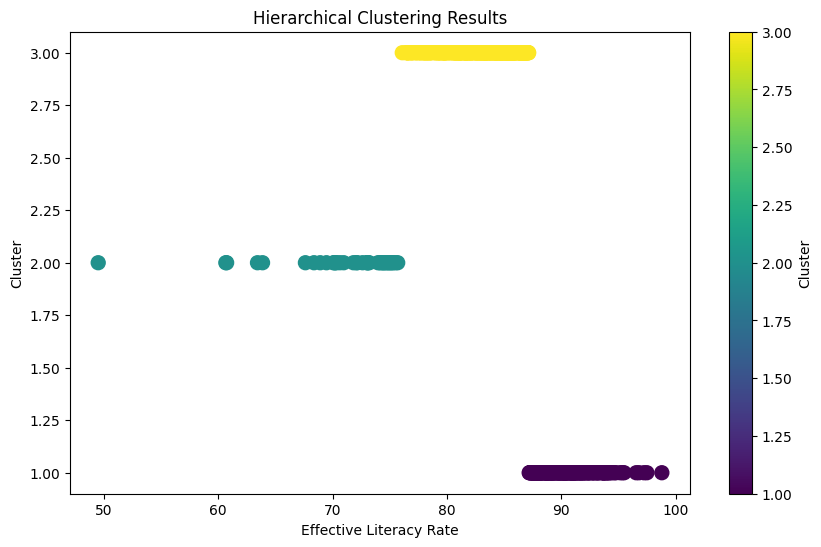


Cluster 1:
  Count: 203
  Min: 87.20
  Max: 98.80
  Mean: 90.45

Cluster 2:
  Count: 38
  Min: 49.51
  Max: 75.70
  Mean: 71.01

Cluster 3:
  Count: 252
  Min: 76.10
  Max: 87.15
  Mean: 82.98


In [17]:
from scipy.cluster.hierarchy import fcluster

# Choose number of clusters based on dendrogram
n_clusters = 3

# Assign clusters
df['Cluster'] = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
# View cluster distribution
print("Cluster distribution:")
print(df['Cluster'].value_counts().sort_index())

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['effective_literacy_rate_total'], df['Cluster'], 
            c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Effective Literacy Rate')
plt.ylabel('Cluster')
plt.title('Hierarchical Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

# Cluster statistics
for cluster in range(1, n_clusters + 1):
    cluster_data = df[df['Cluster'] == cluster]['effective_literacy_rate_total']
    print(f"\nCluster {cluster}:")
    print(f"  Count: {len(cluster_data)}")
    print(f"  Min: {cluster_data.min():.2f}")
    print(f"  Max: {cluster_data.max():.2f}")
    print(f"  Mean: {cluster_data.mean():.2f}")

In [7]:
from scipy.spatial.distance import euclidean

# New city data
new_city = pd.DataFrame({
    'effective_literacy_rate_total': [75.5]
})

# Standardize using same scaler
new_city_scaled = scaler.transform(new_city)

# Find nearest cluster center
cluster_centers = []
for cluster in range(1, n_clusters + 1):
    center = df[df['Cluster'] == cluster]['effective_literacy_rate_total'].mean()
    cluster_centers.append(center)

# Predict cluster
distances = [abs(new_city['effective_literacy_rate_total'].values[0] - center) 
             for center in cluster_centers]
predicted_cluster = distances.index(min(distances)) + 1

print(f"Literacy Rate {new_city['effective_literacy_rate_total'].values[0]}% → Cluster {predicted_cluster}")

Literacy Rate 75.5% → Cluster 2
